In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets.mldata import fetch_mldata

In [2]:
mnist = fetch_mldata('mnist-original', data_home='D:\HK9\TVu_RTC\CKy\HW')
X, y = mnist["data"], mnist["target"]
X = X / 255

In [3]:
X0 = X[np.where(y == 0)[0]]
X1 = X[np.where(y == 1)[0]]
X = np.concatenate((X0, X1), axis=0)

y0 = np.zeros(X0.shape[0])
y1 = np.ones(X1.shape[0])
y = np.concatenate((y0, y1), axis=0)

mix = np.arange(len(y))
np.random.shuffle(mix)
X = X[mix,:]
y= y[mix]

In [4]:
m = 12000
m_test = X.shape[0] - m
x_train, x_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].T, y[m:].T

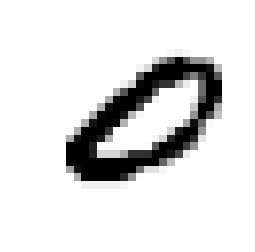

0.0


In [5]:
i = 0
plt.imshow(x_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i])

In [6]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [7]:
def compute_loss(Y, Y_hat):
#     print(Y.shape)
    m = Y.shape[0]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )
    return L

In [8]:
learning_rate = 0.01

X = x_train
Y = y_train

n_x = X.shape[0]
m = X.shape[1]

W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1, 1))

for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)

    cost = compute_loss(Y, A)

    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y, axis=1, keepdims=True)

    W = W - learning_rate * dW
    b = b - learning_rate * db

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  0.6852110109322346
Epoch 100 cost:  0.11876110224523723
Epoch 200 cost:  0.06959907886007818
Epoch 300 cost:  0.05121309472638094
Epoch 400 cost:  0.041425848701468995
Epoch 500 cost:  0.03528072157119875
Epoch 600 cost:  0.031031323914706508
Epoch 700 cost:  0.02790014103861183
Epoch 800 cost:  0.02548670766159977
Epoch 900 cost:  0.023562989312060988
Epoch 1000 cost:  0.021989220035470512
Epoch 1100 cost:  0.020674763350264014
Epoch 1200 cost:  0.019558157282337015
Epoch 1300 cost:  0.018596183616038535
Epoch 1400 cost:  0.01775752502681366
Epoch 1500 cost:  0.017018905782329515
Epoch 1600 cost:  0.0163626484556085
Epoch 1700 cost:  0.01577507398681317
Epoch 1800 cost:  0.015245423086439553
Epoch 1900 cost:  0.01476511046183936
Final cost: 0.014331386344788019


In [9]:
joblib.dump(W,"digits.pkl", compress=3)

['digits.pkl']

In [10]:
Z = np.matmul(W.T, x_test) + b
A = sigmoid(Z)

y_predict = np.where(A < 0.5, 0, 1)
labels = np.where(y_test < 0.5, 0, 1)

print(confusion_matrix(y_predict.T, labels))

[[1324    0]
 [   3 1453]]


real:  1.0 , predict:  1


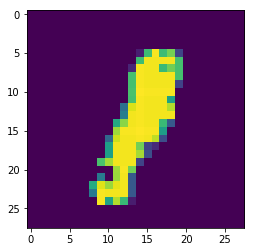

In [11]:
i = 4
plt.imshow(x_test[:,i].reshape(28, 28))
print('real: ',y_test[i],', predict: ',y_predict[:,i][0])

In [12]:
y_predict = np.where(A < 0.5, 0, 1)
labels = np.where(y_test < 0.5, 0, 1)

print(confusion_matrix(y_predict.T, labels))

[[1324    0]
 [   3 1453]]
